# データの傾向をつかもう

いよいよ、データを使って統計分析する手法を学んでいきます。

今回は、Pandas と グラフ描画を組み合わせて、データの可視化による分析を学びます。

__モジュールの準備__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## データ入手

今回は、[ポルトガルの高校生の数学の成績データ](https://archive.ics.uci.edu/ml/datasets/student+performance)を使って、データ解析をします。

<img src="https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/57754/315e0d53-5fed-3f10-db50-eda9ece4f5f9.jpeg" width="60%"/>


```bash
!wget https://kuramitsulab.github.io/data/student-mat.csv
```

`student-mat.csv`をデータフレームとして読み込みます。


In [2]:
data = pd.read_csv('./student-mat.csv')
data.head() #最初の5行を確認

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data.tail() # 最後の5行を確認

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


### データの属性を確認する

新しいデータをロードしたとき、最初に行うことは**データの属性**を確認することです。

|属性名   |説明   |
|--------|------|
|`school`|学校名 |
|`sex`   |性別 `F`: 女性, `M`: 男性  |
|`age`   |年齢   |
|`address`|居住地 `U`: 都市部, `R`: 地方 |
|`famsize`   |性別 `F`: 女性, `M`: 男性  |
|`Pstatus`   |同居 `T`: 同居, `A`: 寮  |
|`Medu`| 母親の学歴 |
|`Fedu`| 父親の学歴 |
|`Mjob`| 母親の職業 |
|`Fjob`| 父親の職業 |
|`reason`| 学校を選んだ理由 |
|`guardian`| 保護者は誰か？ |
|`traveltime`| 通学時間 |
|`studytime`| 週の勉強時間 |
|`failures`| 過去の落第数 |
|`schoolsup`| 補修 |
|`famsup`| 家族からのサポート |
|`paid`| 塾 |
|`activities`| 部活動 |
|`nursery`| 保育園 |
|`higher`| 高等教育 |
|`internet`| インターネット接続 |
|`romantic`| 恋人 |
|`famrel`| 家族関係 |
|`freetime`| 自由時間 |
|`goout`| 友人と遊ぶ頻度 |
|`Dalc`| 平日のアルコール量 |
|`Walc`| 週末のアルコール量 |
|`health`| 健康状態 |
|`absense`| 欠席数 |
|`G1`| 一学期の成績 (０〜２０) |
|`G2`| 二学期の成績 (０〜２０) |
|`G3`| 最終成績 (０〜２０) |

ポルトガルの高校なので、日本人の感覚からすると？？？なところもありますが、
上記の情報が含まれています。

<div class="alert alert-info">

ここからのミッション

高校生の各属性が数学の成績(G1, G2, G3)、特に最終成績に与える影響を調べていきましょう。

</div>


### データの形式を確認する

データの属性を確認したら、次は属性がどのような形式で入っているか確認します。

データの`.info()`を呼ぶと、属性とデータ形式のリストを表示してくれます。


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

データの属性名に続いて、データの個数、さらに形式が`int64`か`object`か示されています。

* `int64`: 数値データ
* `object`: 文字列データ

重要なのは、**数値データ（量的データ）**、**カテゴリデータ（質的データ）**を区別することです。

* 数値データ: 量が数値によって連続的に表現されるデータであり、基本的に比較可能。（例. 人数や金額など)
* カテゴリデータ: カテゴリやグループを表す不連続のデータ

少し注意したいのは、カテゴリデータであっても、カテゴリの種類が数値で表現されていると、`int64`形式となります。
同じく、カテゴリデータであっても、論理値などの比較可能な数値に変換できるものがあります。



`Medu`や`Fedu`は、カテゴリの種類が数値で入っていますが、数値データ(`int64`)と解釈されていますが、カテゴリデータとして処理したいなら、型を`object`に変更しておくとよいでしょう。


In [5]:
data['Medu'] = data['Medu'].astype('object')
data['Fedu'] = data['Fedu'].astype('object')



<div class="alert alert-info">

カテゴリから数値データへの変換

次のように`.map()`を行えば、カテゴリーデータも数値データに変換できます。

```
data['school']=data['school'].map({'GP':0, 'MS':1})
data['sex']=data['sex'].map({'M':0 ,'F':1})
data['address']=data['address'].map({'R':0 ,'U':1})
data['famsize']=data['famsize'].map({'LE3':0 ,'GT3':1})
data['Pstatus']=data['Pstatus'].map({'A':0 ,'T':1})
data['Mjob']=data['Mjob'].map({'at_home':0 ,'services':1, 'teacher':2, 'health':3, 'other':4})
data['Fjob']=data['Fjob'].map({'at_home':0 ,'services':1, 'teacher':2, 'health':3, 'other':4})
data['famsup']=data['famsup'].map({'no':0, 'yes':1})
data['reason']=data['reason'].map({'course':0 ,'home':1, 'reputation':2, 'other':3})
data['guardian']=data['guardian'].map({'mother':0 ,'father':1, 'other':2})
data['schoolsup']=data['schoolsup'].map({'no':0, 'yes':1})
data['paid']=data['paid'].map({'no':0, 'yes':1})
data['activities']=data['activities'].map({'no':0, 'yes':1})
data['nursery']=data['nursery'].map({'no':0, 'yes':1})
data['higher']=data['higher'].map({'no':0, 'yes':1})
data['internet']=data['internet'].map({'no':0, 'yes':1})
data['romantic']=data['romantic'].map({'no':0, 'yes':1})
```

</div>




### カテゴリデータの確認

`data.dtypes`が`object`あるものをカテゴリデータとみなして、
カテゴリデータの属性リストを取り出しています。


In [6]:
# カテゴリデータのリストを取り出す

cat_features = data.dtypes[data.dtypes == 'object']
cat_features = pd.DataFrame(data=cat_features)
cat_features = list(set(cat_features.index))
cat_features

['paid',
 'famsize',
 'higher',
 'Fedu',
 'Medu',
 'school',
 'Pstatus',
 'activities',
 'Fjob',
 'famsup',
 'guardian',
 'internet',
 'address',
 'nursery',
 'sex',
 'schoolsup',
 'Mjob',
 'reason',
 'romantic']

各カテゴリデータがどのような値が含まれるか、調べます。

In [8]:
# カテゴリデータの値の調べる
for cat_feat in cat_features:
    print(cat_feat)
    print(data[cat_feat].value_counts())
    print()

paid
no     214
yes    181
Name: paid, dtype: int64

famsize
GT3    281
LE3    114
Name: famsize, dtype: int64

higher
yes    375
no      20
Name: higher, dtype: int64

Fedu
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64

Medu
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64

school
GP    349
MS     46
Name: school, dtype: int64

Pstatus
T    354
A     41
Name: Pstatus, dtype: int64

activities
yes    201
no     194
Name: activities, dtype: int64

Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

famsup
yes    242
no     153
Name: famsup, dtype: int64

guardian
mother    273
father     90
other      32
Name: guardian, dtype: int64

internet
yes    329
no      66
Name: internet, dtype: int64

address
U    307
R     88
Name: address, dtype: int64

nursery
yes    314
no      81
Name: nursery, dtype: int64

sex
F    208
M    187
Name: sex, dtype: int64

schoolsup
no     344
yes     51
N

### 数値データの要約

`describe()`は、数値データの基礎統計量を集計するメソッドです。

__基礎統計量__

* `count`: データ数
* `mean`: 平均値
* `std`: 標準偏差
* `min`: 最小値
* `25%`: 小さい方から25%目の値（第一四分位点）
* `50%`: 中央値
* `75%`: 小さい方から75%目の値（第三四分位点）
* `max`: 最大値

ざっくりと傾向をみるとき、重宝します。


In [9]:
data.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## 可視化

表データも、基礎統計量だけ、数値だけみていても、データの傾向をつかめません。

__G3列の基礎統計量__

In [10]:
data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

ちなみに、`G3`が0.0の学生は、ドロップアウトしてしまった学生です。エラーではありません。

<div class="alert alert-info">

Let's try

ここから例として、`G3`列を示しますが、他の属性も自分で調べてみましょう。

</div>

さて、それではMatplotlib を用いてデータの可視化していきましょう。

### 箱ひげ図

箱ひげ図は、最大値、最小値、中央値、四分位範囲を視覚化してくれるグラフです。
ヒゲの上端が最大値、ヒゲの下端が最小値を示します。データの範囲がみえてきます。

__最終成績(G3)の箱ヒゲ図__


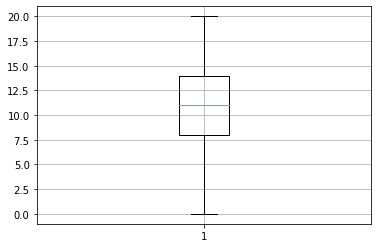

In [11]:
plt.boxplot(data['G3'])
plt.grid(True)


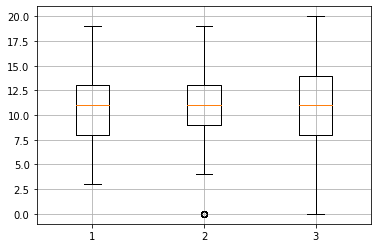

In [12]:
## G1, G2, G3 と表示する例
plt.boxplot([data['G1'], data['G2'], data['G3']])
plt.grid(True)

seaborn の`boxplot()`を用いれば、もう少しこった凝ったヒストグラムを描画できます。

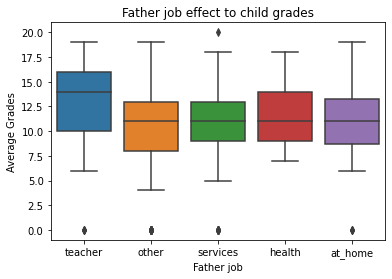

In [30]:
sns.boxplot(x=data['Fjob'],y=data['G3'])
plt.title('Father job effect to child grades')
plt.xlabel('Father job')
plt.ylabel('Average Grades')
plt.show()

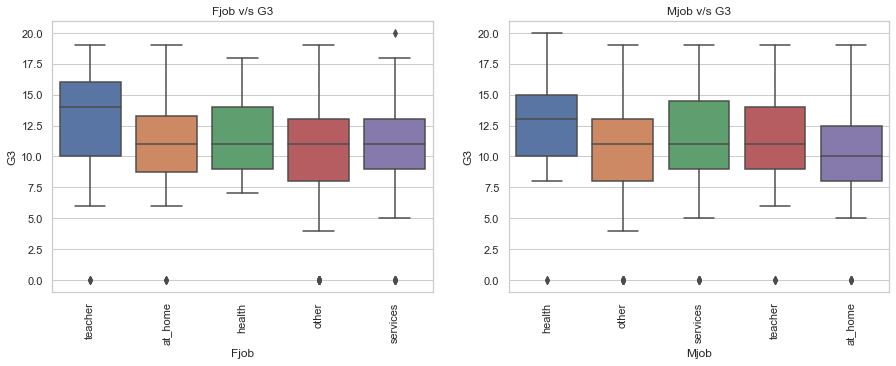

In [48]:
## subplot を使った凝ったグラフ

plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
order_by = data.groupby('Fjob')['G3'].median().sort_values(ascending = False).index
sns.boxplot(x = data['Fjob'], y = data['G3'],order = order_by)
plt.xticks(rotation = 90)
plt.title('Fjob v/s G3')

plt.subplot(1,2,2)
order_by = data.groupby('Mjob')['G3'].median().sort_values(ascending = False).index
sns.boxplot(x = data['Mjob'], y = data['G3'],order = order_by)
plt.xticks(rotation = 90)
plt.title('Mjob v/s G3')

plt.show()

### ヒストグラム

おなじみのヒストグラムも描画してみましょう。

__最終成績(G3)のヒストグラム__

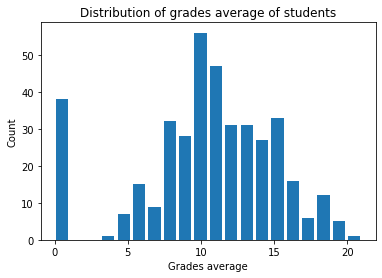

In [24]:
plt.hist(data['G3'], bins=20, range=[0,21], rwidth=0.8)
plt.title('Distribution of grades average of students')
plt.xlabel('G3')
plt.ylabel('Count')
plt.show()

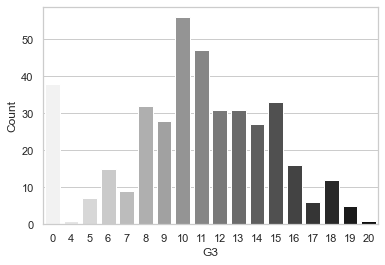

In [44]:
sns.countplot(x=data['G3'], palette='gray_r')
sns.set_theme(style="whitegrid")
plt.xlabel('G3')
plt.ylabel('Count')
plt.show()

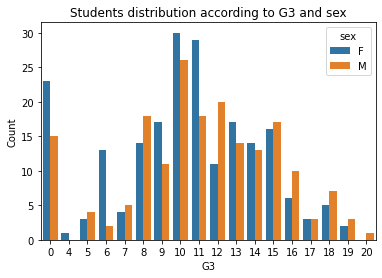

In [26]:
sns.countplot('G3',hue='sex', data=data)
plt.title('Students distribution according to G3 and sex')
plt.xlabel('G3')
plt.ylabel('Count')
plt.show()

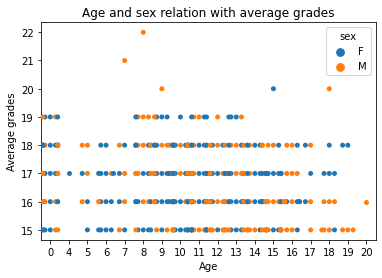

In [29]:
sns.swarmplot(x='G3', y='age',hue='sex', data=data)
plt.title('Age and sex relation with average grades')
plt.xlabel('G3')
plt.ylabel('Age')
plt.show()

### 散布図と相関係数

ここまでは、基本的にひとつの属性に着目してきました。
属性間の関係性により注目するため、散布図と相関係数を学びます。

__一学期の成績(G1)と最終成績(G3)__

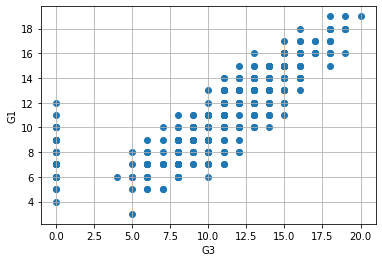

In [33]:
plt.scatter(data['G3'], data['G1'], marker='o')
plt.xlabel('G3')
plt.ylabel('G1')
plt.grid(True)

第一学期から成績が良い学生が最終成績の成績がよくなる傾向がグラフから読み取ることができます。

この関係性を数値化する手法が、[相関係数](https://ja.wikipedia.org/wiki/相関係数)です。

* 1に近いほど、正の相関がある
* 0無相関
* -1に近いほど、負の相関がある

Python では、SciPy に含まれている`pearsonr`を使って相関係数を算出できます。

__G3とG1の相関係数__



In [34]:
import scipy as sp
sp.stats.pearsonr(data['G1'], data['G3'])

(0.8014679320174141, 9.001430312277354e-90)

ひとつ目の値が相関係数です。（ふたつ目の値は、p値です。）

<div class="alert alert-info">

p値

偶然、実際に反した数値が統計量として計算される確率です。p値が低いほど、ありえないことが起きたことになります。（確率統計の講義を思い出してください。）

</div>



#### 線形近似（予習）

成績G3とG1の関係を$y = ax + b$という線形近似をしてみます。

次回以降用いる機械学習モジュール`sklearn`を予習として用いて、
[最小二乗法](https://ja.wikipedia.org/wiki/最小二乗法)によって、$a$(回帰係数)と$b$(切片)を求めます。

__線形近似__

In [36]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = data.loc[:, ['G3']].values
Y = data['G1'].values
reg.fit(X, Y)
print('a=', reg.coef_, ', b=', reg.intercept_)

a= [0.58065293] , b= 4.861250211993213


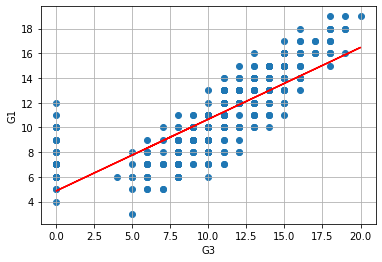

In [37]:
plt.scatter(X, Y)
plt.xlabel('G3')
plt.ylabel('G1')

plt.plot(X, reg.predict(X), color='red') # y=ax+bを描画
plt.grid(True)

<div class="alert alert-info">

`reg.predict(X)`って何？という話は

線形回帰のところで詳しく話します。

</div>


## 可視化（プロの技）

最後に、少しデータサイエンスの可視化テクニックを紹介します。

### 相関行列とヒートマップ

相関行列は、すべての属性（数値データ間）で相関係数を計算した行列です。

__相関行列__


In [38]:
data.corr()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
traveltime,0.070641,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660
Walc,0.117276,0.134116,-0.253785,0.141962,-0.113397,0.147822,0.420386,0.647544,1.000000,0.092476,0.136291,-0.126179,-0.084927,-0.051939
health,-0.062187,0.007501,-0.075616,0.065827,0.094056,0.075733,-0.009577,0.077180,0.092476,1.000000,-0.029937,-0.073172,-0.097720,-0.061335


ご多分に漏れず、可視化しておくとデータ解析が行やすいです。

<AxesSubplot:>

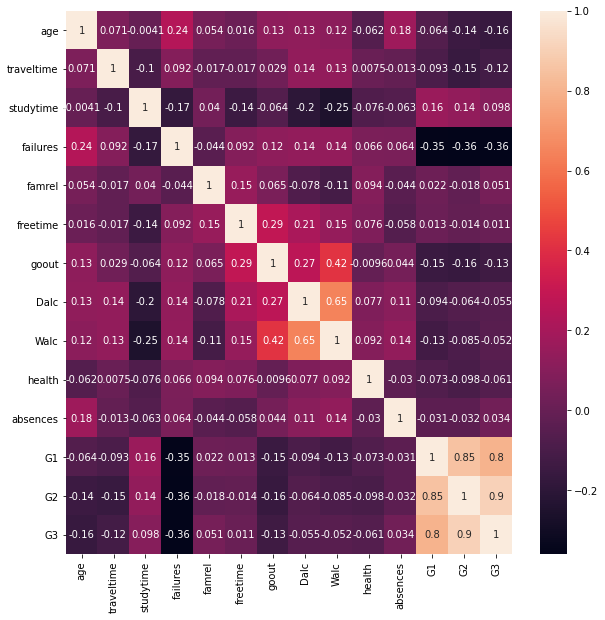

In [39]:
# Correlation matrix
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

### ヒストグラムと散布図をまとめて書く

seabornモジュールの`pairplot`を用いると、さまざまな属性の関係性を一度に確認できます。

* 欠席数`absences`
* アルコール摂取量`Dalc`
* 年齢`age`
* 最終成績`G3`

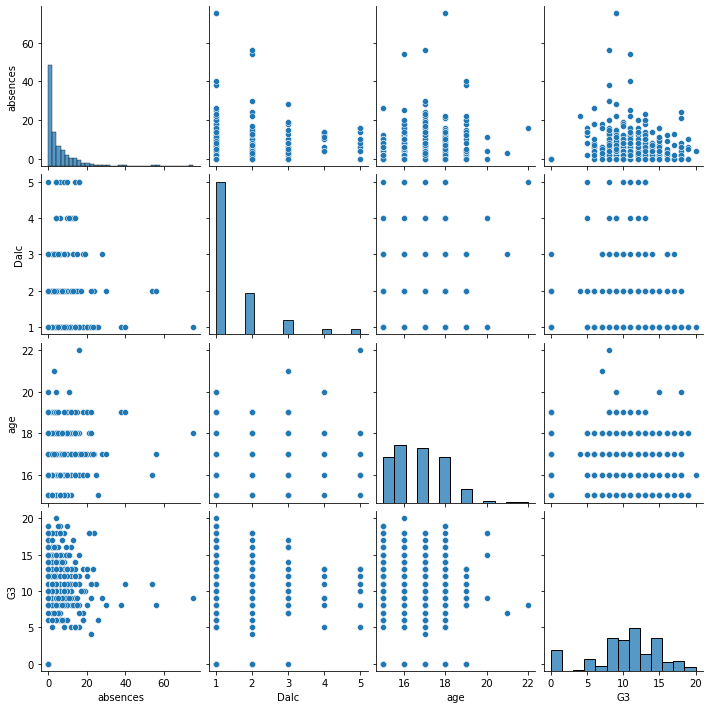

In [41]:
sns.pairplot(data[['absences', 'Dalc', 'age', 'G3']])

### カテゴリーデータを視覚化する

カテゴリデータの分類がどのように散らばっているか一覧を作ります。


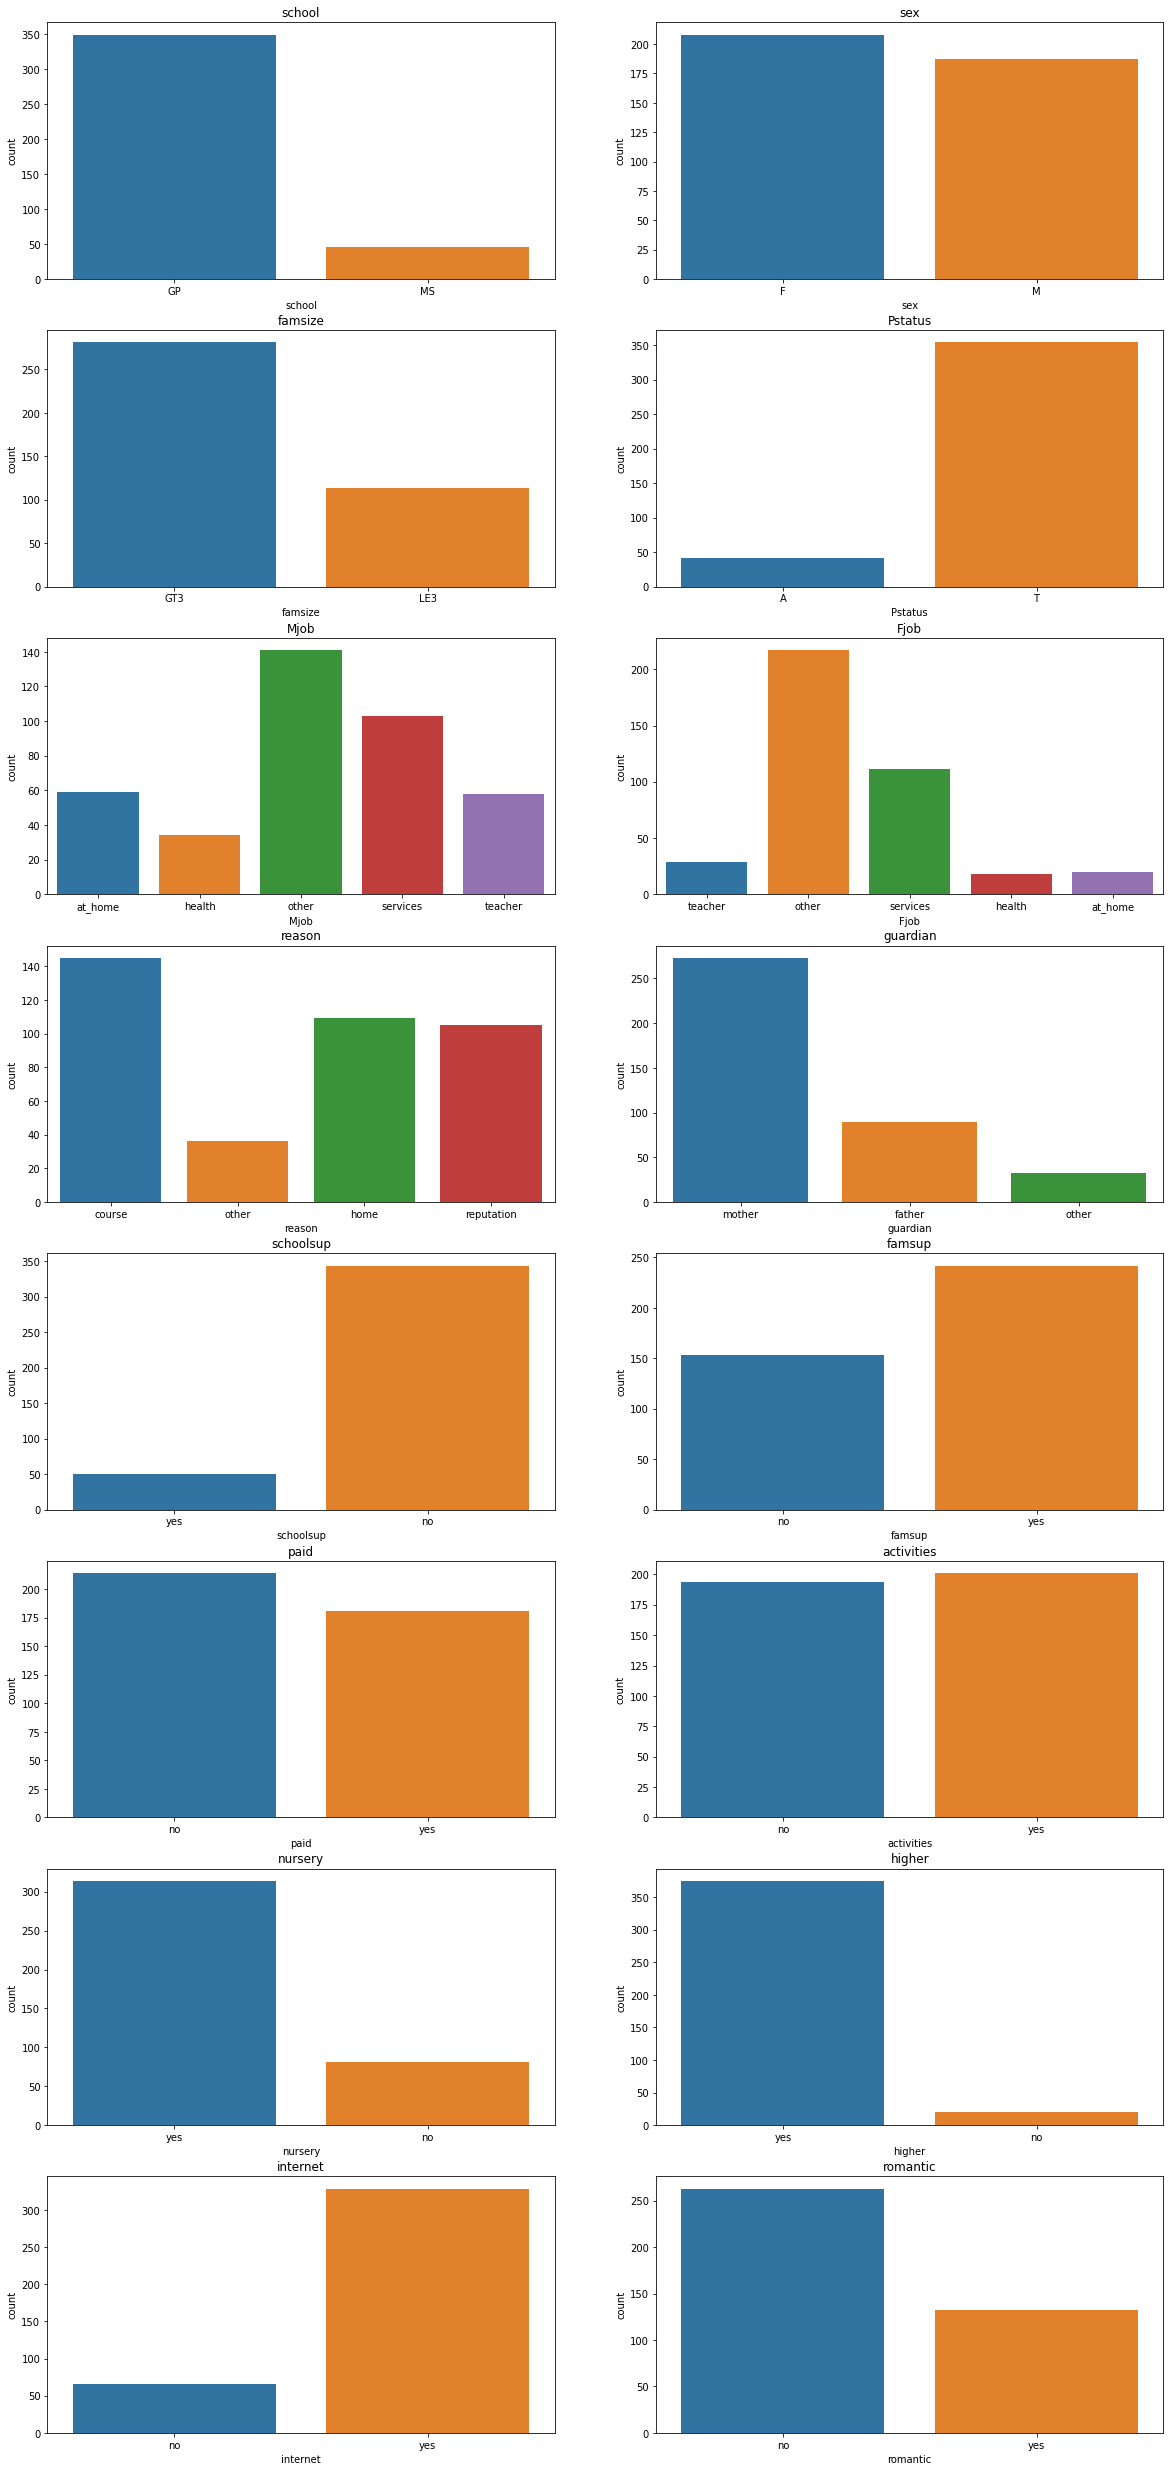

In [42]:
plt.figure(figsize = (20,50))
for i,item in enumerate(['school', 'sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']):
    plt.subplot(9,2,i+1)
    sns.countplot(data[item])
    plt.title(item)

plt.show()   

### カーネル密度推定法によるグラフ

Seabornの更なる使い方
https://swdrsker.hatenablog.com/entry/2016/12/10/070512


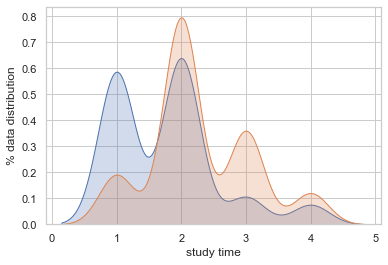

In [49]:
sns.kdeplot(data.groupby('sex').get_group('M')['studytime'], shade = True,label = 'male')
sns.kdeplot(data.groupby('sex').get_group('F')['studytime'], shade = True, label = 'female')
plt.xlabel('study time')
plt.ylabel('% data distribution')
plt.show()

## コースワーク

<div class="admonition tip">

**演習（ランチボックス）**

カフェフロアで販売されているお弁当の販売数のデータを可視化して、
特徴をつかんでみよう。

|ヘッダ名称|説明|
|--------|----|
|datetid|インデックスとして使用する日付|
|y|販売数|
|week|曜日（月～金）|
|soldout|完売フラグ（0:完売せず、1:完売）
|name|メインメニュー
|kcal|おかずのカロリー（kcal）|
|remarks|特記事項|
|event|社内イベント|
|payday|給料日フラグ（1:給料日）|
|weather|天気|
|precipitation|降水量|
|temperature|気温|

</div>

__データの入手方法__

[SIGNATE社のコンテスト用データ](https://signate.jp/competitions/24)を
利用させていただきます。データの入手法の詳細は授業中に紹介します。


<!--
! wget http://kuramitsulab.github.io/data/bento_train.csv
! wget http://kuramitsulab.github.io/data/bento_test.csv
-->